In [97]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [68]:
def gen_raspr(m1,m2,sig, num = 1000):
    s1 = np.random.normal(m1, sig, num)
    s2 = np.random.normal(m2, sig, num)
    return [s1,s2]

In [65]:
def draw_all(s1,s2,sh = 0.5):
    fig, ax = plt.subplots()
    s =  np.concatenate((s1, s2))
    ax.hist(s, bins = np.arange(min(s), max(s), sh)  ,  alpha = 0.3)
    ax.hist(s1, bins = np.arange(min(s1), max(s1), sh), alpha = 0.3)
    ax.hist(s2, bins = np.arange(min(s2), max(s2), sh) ,  alpha = 0.3)
    fig.set_figwidth(12)
    fig.set_figheight(6)
    plt.show()

In [82]:
def get_metrics(s):
    med = np.median(s)
    razm = max(s) - min(s)
    return [med, razm]

In [110]:
def work(m1 = 10, m2 = -10, d = 10, num = 10000, dr = False):
    s1,s2 = gen_raspr(m1,m2,d,num)
    if dr:
        draw_all(s1,s2, sh = 1)
    s = np.concatenate((s1, s2))
    norm.cdf(s)
    return get_metrics(s), [m1 + m2, 2*d**2], [np.mean(s), np.var(s)]

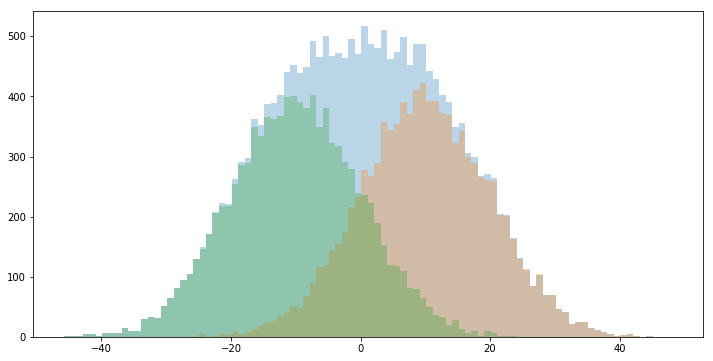

Медиана:  0.09527431304313527
Размах:  94.0214634375805
Теоретичесое матожидание/среднее выборки 0 / 0.0048923255834866725
Теоретическая дисперсия/дисперсия выборки 200 / 199.88482024463516


In [118]:
rez, teor, pract = work(dr = True)
print("Медиана: ", rez[0])
print("Размах: ", rez[1])
print('Теоретичесое матожидание/среднее выборки: ', teor[0], '/', pract[0])
print('Теоретическая дисперсия/дисперсия выборки: ', teor[1], '/', pract[1])

In [172]:
def get_stats(dr = False):
    steps0 = np.arange(50,90,10)
    steps1 = np.arange(100,900,100)
    steps2 = np.arange(1000,12000,1000)
    steps = np.concatenate((steps0, steps1, steps2))
    dm = []
    dd = []
    for i in steps:
        rez, teor, pract = work(num = int(i),dr = False)
        dm.append(abs(teor[0] - pract[0]))
        dd.append(abs(teor[1] - pract[1]))
    if dr:
        fig, ax = plt.subplots()
        ax.plot(steps, dm)
        ax.plot(steps, dd)
        fig.set_figwidth(16)
        fig.set_figheight(6)
        plt.show()
    return dm, dd, steps

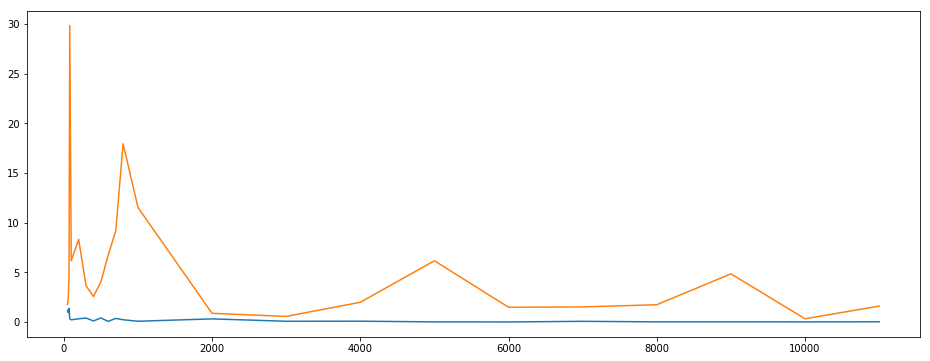

In [180]:
i = get_stats(True)

In [178]:
dm, dd, steps = get_stats()
sdm = np.array([dm])
sdd = np.array([dd])
for i in range(50):
    dm, dd, steps = get_stats()
    sdm = np.concatenate((sdm,np.array([dm])))
    sdd = np.concatenate((sdd,np.array([dd])))